# Predicting whether a passenger will survive or not

### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=pd.read_csv("train.csv")

In [3]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking null values in the dataset

In [6]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

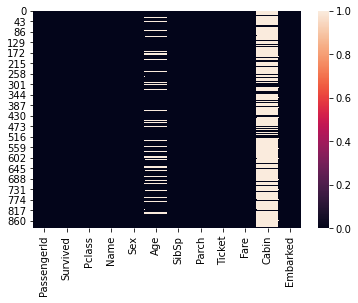

In [7]:
sns.heatmap(x.isnull())

### Visualizing the data 

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

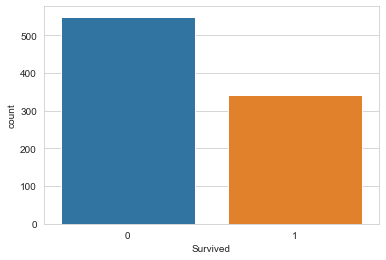

In [8]:
sns.set_style('whitegrid')
sns.countplot(x['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

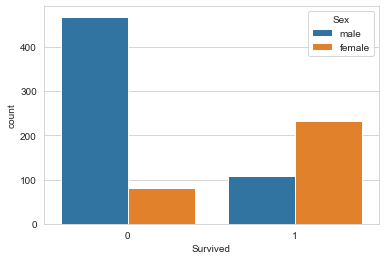

In [9]:
sns.countplot(x='Survived',hue='Sex',data=x)

From the above graph we can see that the changes of survival of females is more than that of males

<AxesSubplot:xlabel='Survived', ylabel='count'>

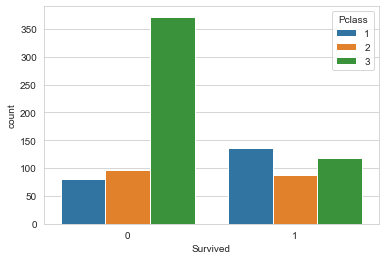

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=x)

Here we can see that majority of the people who died were from third class

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

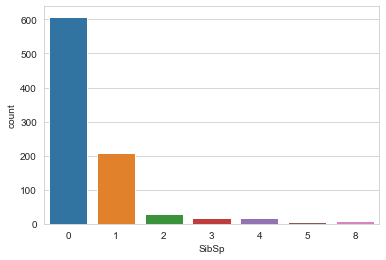

In [11]:
sns.countplot(x['SibSp'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

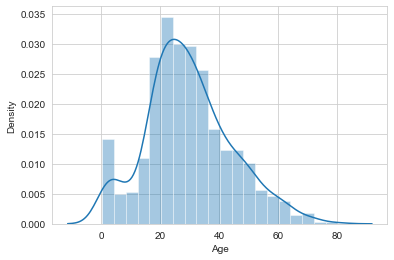

In [12]:
sns.distplot(x['Age'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

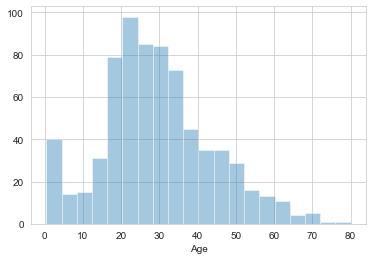

In [13]:
sns.distplot(x['Age'].dropna(),kde=False)

<AxesSubplot:>

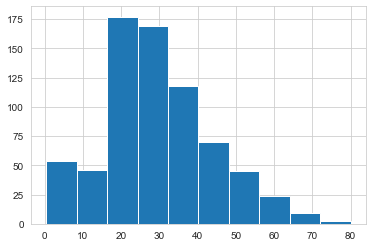

In [14]:
x['Age'].hist()

<AxesSubplot:>

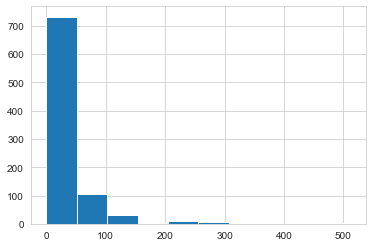

In [15]:
x['Fare'].hist()

### Dealing with null values

In [16]:
x.fillna({'Age':(x['Age'].mean()),
             'Embarked':x['Embarked'].mode()[0]},inplace=True)

In [17]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Removing not so important columns

In [19]:
target=x.Survived
x.drop(['PassengerId','Name','Ticket',"Cabin"],inplace =True,axis=1)
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
pd.DataFrame(target)

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### Encoding

In [21]:
x_dummy=pd.get_dummies(x,drop_first=True)
x_dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [22]:
x['Sex']=pd.get_dummies(x['Sex'],drop_first=True)

In [23]:
x.drop(['Embarked'],axis=1,inplace=True)

In [24]:
x.drop(['Survived'],axis=1,inplace=True)

In [25]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


### Train Test Splitting

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,target_train,target_test=train_test_split(x,target,test_size=0.3,random_state=0)

In [28]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
857,1,1,51.000000,0,0,26.5500
52,1,0,49.000000,1,0,76.7292
386,3,1,1.000000,5,2,46.9000
124,1,1,54.000000,0,1,77.2875
578,3,0,29.699118,1,0,14.4583
...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583
192,3,0,19.000000,1,0,7.8542
629,3,1,29.699118,0,0,7.7333
559,3,0,36.000000,1,0,17.4000


In [29]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare
495,3,1,29.699118,0,0,14.4583
648,3,1,29.699118,0,0,7.5500
278,3,1,7.000000,4,1,29.1250
31,1,0,29.699118,1,0,146.5208
255,3,0,29.000000,0,2,15.2458
...,...,...,...,...,...,...
263,1,1,40.000000,0,0,0.0000
718,3,1,29.699118,0,0,15.5000
620,3,1,27.000000,1,0,14.4542
786,3,0,18.000000,0,0,7.4958


In [30]:
target_train

857    1
52     1
386    0
124    0
578    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 623, dtype: int64

In [31]:
target_test

495    0
648    0
278    0
31     1
255    1
      ..
263    0
718    0
620    0
786    1
64     0
Name: Survived, Length: 268, dtype: int64

### Machine Learning model

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [33]:
lr.fit(x_train,target_train)

LogisticRegression()

In [34]:
result=lr.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(target_test,result)

0.8022388059701493

In [37]:
from sklearn.linear_model import LogisticRegressionCV
lrcv=LogisticRegressionCV()

In [38]:
lrcv.fit(x_train,target_train)

LogisticRegressionCV()

In [39]:
prediction=lrcv.predict(x_test)

In [40]:
accuracy_score(target_test,prediction)

0.8059701492537313

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [42]:
dtc.fit(x_train,target_train)

DecisionTreeClassifier()

In [43]:
rfc.fit(x_train,target_train)

RandomForestClassifier()

### Decision Tree

In [44]:
prediction=dtc.predict(x_test)

In [45]:
accuracy_score(target_test,prediction)

0.8059701492537313

### Random forest classifier

In [46]:
prediction=rfc.predict(x_test)

In [47]:
accuracy_score(target_test,prediction)

0.8171641791044776

We can see that random forest classifier gives the best accuracy so we will use this model for prediction

### Predicting survival

In [48]:
y=pd.read_csv('test.csv')

In [49]:
Y=pd.read_csv('test.csv')

In [50]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


### Preparing test data set for prediction

In [52]:
y.drop(['PassengerId','Name','Ticket',"Cabin"],inplace =True,axis=1)
y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [53]:
y.fillna({'Age':(y['Age'].mean()),'Fare':(y['Fare'].mean())},inplace=True)

In [54]:
y.drop(['Embarked'],axis=1,inplace=True)

In [55]:
y['Sex']=pd.get_dummies(y['Sex'],drop_first=True)

In [56]:
y.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [57]:
result=rfc.predict(y)

In [58]:
pd.DataFrame(result).head()

,0
0,0
1,0
2,0
3,1
4,0


In [59]:
final_result=pd.DataFrame(Y['PassengerId'])

In [60]:
final_result['Survived']=result

In [61]:
final_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
